In [2]:
import numpy as np
from numpy import pi, sqrt, cos, sin, radians, arcsin
import matplotlib.pyplot as plt




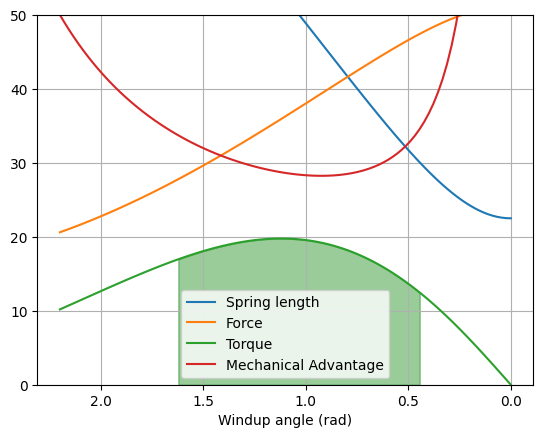

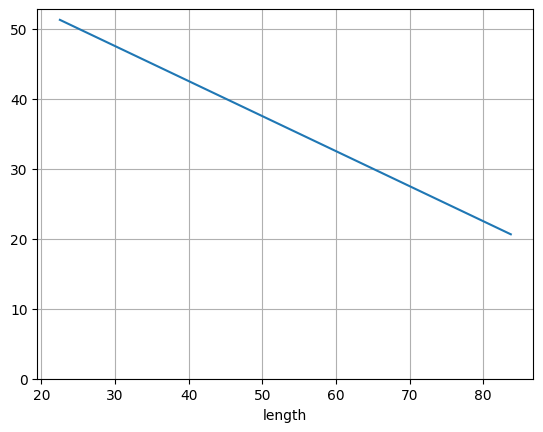

In [3]:
L1 = 57.896
L2 = 35.384
k = 0.5
L0 = 85
F0 = 20
theta_start = radians(94.1)
theta_end = radians(94.1 - 68.8)

thetas = np.linspace(2.2, 0, 100)

Ls = sqrt(L1**2 + L2**2 - 2*L1*L2*cos(thetas))
Fs = k*np.abs(L0 - Ls) + F0
phis = arcsin(L2*sin(thetas)/L1)
Ts = Fs*sin(phis)

mech_advs = np.diff(thetas)/np.diff(Ls)

plt.figure()
plt.ylim(ymin=0, ymax=50)
plt.plot(thetas, Ls, label='Spring length')
plt.plot(thetas, Fs, label='Force' )
plt.plot(thetas, Ts, label='Torque')
plt.plot(thetas[:-1], 1000*mech_advs, label='Mechanical Advantage')
plt.xlabel('Windup angle (rad)')
# plt.title('')
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()

# Highlight the area underneath the Ls curve between x=2 and 1

x_fill = thetas[(thetas <= theta_start) & (thetas >= theta_end)]
y_fill = Ts[(thetas <= theta_start) & (thetas >= theta_end)]
plt.fill_between(x_fill, y_fill, color='green', alpha=0.4)
# plt.grid(None)
plt.show()

plt.figure()
plt.plot(Ls, Fs)
plt.grid(True)
plt.xlabel('length')
plt.ylim(ymin=0)


plt.show()

0.6111648473124223


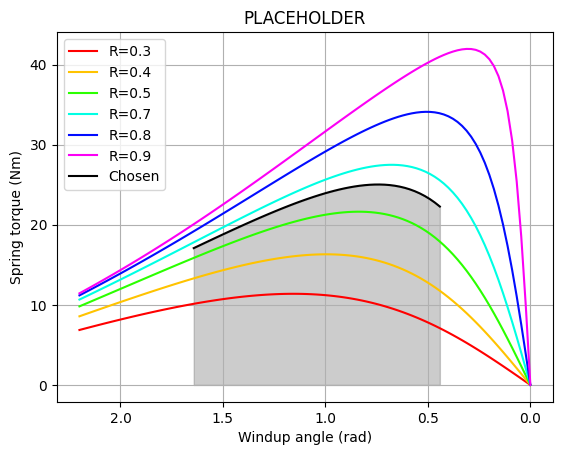

In [5]:
plt.figure()

L1 = 0.057896
theta_start = radians(94.1)
theta_end = radians(94.1 - 68.8)
thetas = np.linspace(2.2, 0, 100)
L0 = 0.085
n_springs = 6
k = 43*n_springs
F0 = 5*n_springs

R_real = 0.035384/L1
print(R_real)

# L2 = 35.384
for R in np.linspace(0.3, 0.9, 6):
    L2 = R*L1
    L1_rescale = L1

    Ls = sqrt(L1_rescale**2 + L2**2 - 2*L1_rescale*L2*cos(thetas))
    Fs = k*(L0 - Ls) + F0
    # phis = arcsin()
    Ts = Fs*L2*sin(thetas)/Ls
    T_norms = Ts/max(Ts)

    # plt.plot(thetas, Ls, label='Spring length (mm)')

    color = plt.cm.hsv(R*1.5-0.5)  # Use a red-blue colormap to vary color based on R
    # plt.plot(thetas, Fs, label=f"{R:.2f}", color=color)
    plt.plot(thetas, Ts, label=f"R={R:.1f}", color=color)


thetas = np.linspace(theta_start, theta_end, 50)
L2 = R_real * L1
Ls = sqrt(L1**2 + L2**2 - 2*L1*L2*cos(thetas))
Fs = k*(L0 - Ls) + F0
phis = arcsin(L2*sin(thetas)/Ls)
Ts = Fs*sin(phis)
T_norms = Ts/max(Ts)
plt.plot(thetas, Ts, label=f"Chosen", color='black')


x_fill = thetas[(thetas <= theta_start) & (thetas >= theta_end)]
y_fill = Ts[(thetas <= theta_start) & (thetas >= theta_end)]
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.4)

# plt.ylim(ymin=0, ymax=50)
plt.xlabel('Spring compression angle (rad)')
plt.ylabel('Spring torque (Nm)')
plt.title('PLACEHOLDER')
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()

plt.savefig('spring_torque_plot.pdf', format='pdf')
